The following procedures are aimed at exploring and analyzing different databases with the end goal of extracting valuable information and identifying patterns. In particular, the first part focuses on the dataset "vending.csv", provided for the assignment, while the following two parts are centered on datasets obtained from the surveys run on Qualtrics both for the general testing of the proposed hypothesis and for the A/B testing of our final proposals.

# PART A (Analyses of provided dataset)

## Index:    <a class="anchor" id="index"></a>
* [Index](#index)
* [Import of relevant libraries](#zero-bullet)
* [Import of data](#first-bullet)
* [Missing Values and Type Checks](#second-bullet)
* [Correlation Checks](#corr-bullet)
* [Dealing with Excess Columns](#third-bullet)
* [Data Visualization and Outliers Checks](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
* [Exploratory Data Analysis](#sixth-bullet)
* [First t-test](#seventh-bullet)
* [Cash vs Credit Comparison](#eighth-bullet)
* [Second t-test](#ninth-bullet)
* [Cash-Carbonated vs Credit-Carbonated](#tenth-bullet)
* [Location](#eleventh-bullet)
* [RCoil](#twelfth-bullet)
* [CatBoost](#thirhtenth-bullet)



# Import of relevant libraries <a class="anchor" id="zero-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
%matplotlib inline
np.random.seed(42)

# Import of data <a class="anchor" id="first-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [11]:
db=pd.read_csv('vending.csv')

Brief vizualization the head of the dataset to have a grasp at the data:

In [12]:
db.head()

Status    Device ID           Location               Machine  \
0  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
1  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
2  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
3  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   
4  Processed  VJ300320611  Brunswick Sq Mall  BSQ Mall x1366 - ATT   

                                Product    Category  Transaction  \
0  Red Bull - Energy Drink - Sugar Free  Carbonated  14515778905   
1  Red Bull - Energy Drink - Sugar Free  Carbonated  14516018629   
2      Takis - Hot Chilli Pepper & Lime        Food  14516018629   
3      Takis - Hot Chilli Pepper & Lime        Food  14516020373   
4  Red Bull - Energy Drink - Sugar Free  Carbonated  14516021756   

                   TransDate    Type  RCoil  RPrice  RQty  MCoil  MPrice  \
0  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   
1  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   
2  Saturday, January 1, 2022  Credit    123     1.5     1    123     1.5   
3  Saturday, January 1, 2022  Credit    123     1.5     1    123     1.5   
4  Saturday, January 1, 2022  Credit    148     3.5     1    148     3.5   

   MQty  LineTotal  TransTotal Prcd Date  
0     1        3.5         3.5  1/1/2022  
1     1        3.5         5.0  1/1/2022  
2     1        1.5         5.0  1/1/2022  
3     1        1.5         1.5  1/1/2022  
4     1        3.5         3.5  1/1/2022

In [13]:
db.shape

(6445, 18)

# Missing Values and Type Checks <a class="anchor" id="second-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

A check for missing values has then been conducted: 

In [14]:
db.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          4
Category       185
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           1
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

For further analyses, the index of the missing values is retrieved:

In [15]:
db[db['MPrice'].isnull()].index.tolist()

[5500]

In [16]:
db[db['Product'].isnull()].index.tolist()

[1232, 1431, 1439, 5500]

In [17]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232,
 1431,
 1439,
 1448,
 1453,
 1454,
 1501,
 1507,
 1517,
 1544,
 1569,
 1578,
 1579,
 1779,
 1815,
 2845,
 2871,
 2888,
 2905,
 2924,
 2927,
 2940,
 2948,
 2969,
 2985,
 3008,
 3043,
 3052,
 3057,
 3127,
 3141,
 3162,
 3179,
 3233,
 3254,
 3270,
 3327,
 3355,
 3378,
 3423,
 3447,
 3463,
 3517,
 3522,
 3524,
 3526,
 3528,
 3532,
 3538,
 3541,
 3612,
 3647,
 3655,
 3674,
 3693,
 3707,
 3708,
 3765,
 3766,
 3768,
 3771,
 3772,
 3779,
 3784,
 3790,
 3792,
 3794,
 3849,
 3864,
 3903,
 3917,
 3928,
 3955,
 3965,
 3996,
 4012,
 4036,
 4089,
 4090,
 4091,
 4095,
 4099,
 4100,
 4104,
 4113,
 4116,
 4117,
 4131,
 4135,
 4136,
 4144,
 4156,
 4161,
 4181,
 4192,
 4202,
 4214,
 4229,
 4237,
 4238,
 4274,
 4294,
 4296,
 4306,
 4321,
 4341,
 4345,
 4350,
 4364,
 4365,
 4375,
 4384,
 4420,
 4425,
 4430,
 4431,
 4432,
 4451,
 4465,
 4471,
 4505,
 4508,
 4520,
 4524,
 4528,
 4532,
 4543,
 4565,
 4566,
 4584,
 4585,
 4597,
 4607,
 4625,
 4626,
 4638,
 4676,
 4768,
 4770,
 4796,
 4826,
 4864,
 4866,

Seeing that most of the missing values are in the attribute "Category" but not in the attribute "Product", it is possible to retreive the name of the product so that the missing value can be replaced manually leading to no data loss:

In [18]:
missing=set(db['Product'][mis])
missing

{'Canada Dry - Ginger Ale',
 'Canada Dry - Ginger Ale & Lemonde',
 'Doritos Dinamita Chile Lemon',
 'Doritos Spicy Nacho',
 'Mini Chips Ahoy - Go Paks',
 'Oreo Mini - Go Paks',
 'Starbucks Doubleshot Energy - Coffee',
 'Teddy Grahams - Go Paks',
 nan}

Filling up of NaNs can is done with the following loop:

In [19]:
for i in mis:
    if db['Product'][i]=='Canada Dry - Ginger Ale':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Canada Dry - Ginger Ale & Lemonde':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Doritos Dinamita Chile Lemon':
        db['Category'][i]='Food'
    if db['Product'][i]=='Doritos Spicy Nacho':
        db['Category'][i]='Food'
    if db['Product'][i]=='Mini Chips Ahoy - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Oreo Mini - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Starbucks Doubleshot Energy - Coffee':
        db['Category'][i]='Non Carbonated'
    if db['Product'][i]=='Teddy Grahams - Go Paks':
        db['Category'][i]='Food'

There should still remain 4 missing values in the feature "Category" corresponding to those entries that also have a misisng value in the "Product" feature:

In [20]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232, 1431, 1439, 5500]

In [21]:
newdb=db.drop(mis,axis=0)

In [22]:
newdb.shape

(6441, 18)

As no further operation is possibile to retrive the 4 missing values left, they have been dropped. Being that they are only 4, out of a total of 6445 observations, the risk of data loss is fairly limited.

Checks of the types of inputs data are then performed:

In [23]:
newdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6441 non-null   object 
 1   Device ID    6441 non-null   object 
 2   Location     6441 non-null   object 
 3   Machine      6441 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6441 non-null   object 
 6   Transaction  6441 non-null   int64  
 7   TransDate    6441 non-null   object 
 8   Type         6441 non-null   object 
 9   RCoil        6441 non-null   int64  
 10  RPrice       6441 non-null   float64
 11  RQty         6441 non-null   int64  
 12  MCoil        6441 non-null   int64  
 13  MPrice       6441 non-null   float64
 14  MQty         6441 non-null   int64  
 15  LineTotal    6441 non-null   float64
 16  TransTotal   6441 non-null   float64
 17  Prcd Date    6441 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

An additional check to see whether the feature "Status" presents a unique value or more than one has then been performed with the result that the column contains only one value (namely "Processed"):

In [24]:
newdb["Status"].unique()

array(['Processed'], dtype=object)

# Correlation Checks <a class="anchor" id="corr-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

In [25]:
corr_matrix=newdb.corr()

<AxesSubplot:>

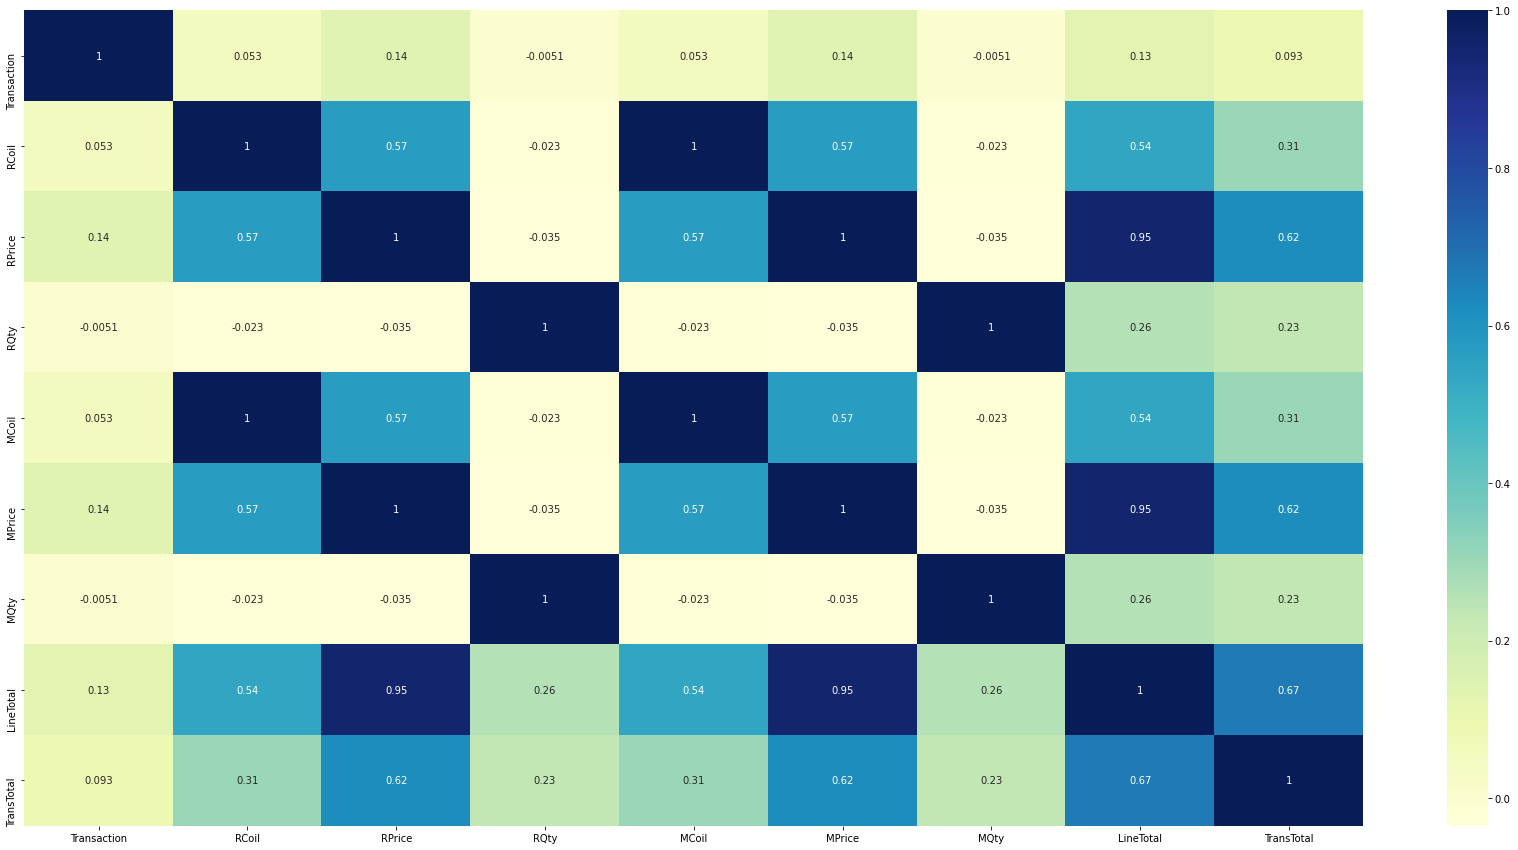

In [26]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

From the correlation matrix it can be seen that some variables present really high (even perfect in some case) correlation with each other. Correlation can cause issues in several algorithms and models, for this reason, this highly correlated variables will be better explored in the subsequent section. 

# Dealing with Excess Columns <a class="anchor" id="third-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

In this subsection, all excess columns will be dropped.
To begin with, it can be seen that Coil, Qty, and Price are present in two differnt variations inside the provided dataset. Given that the correlation between the variations is perfect (Pearson's correlation coefficient=1), as highlighted by the correlation matrix, it is very likely that the variations of the aforementioned columns are identical. An assesment of whether they contain the same information is therefore run:

In [27]:
sum(newdb["RCoil"]==newdb["MCoil"])

6441

In [28]:
sum(newdb["RQty"]==newdb["MQty"])

6441

In [29]:
sum(newdb["RPrice"]==newdb["MPrice"])

6441

The assesment conducted, yielded the result that the information contained in the columns compared are the same. Now the same procedure is also run for "RPrice" and "LineTotal" that, in theory, should present at least some different values:

In [30]:
sum(newdb["RPrice"]==newdb["LineTotal"])

6360

And indeed they do.

Now, a check to see whether there are some Transaction ID that are repeated in several dates has been conducted:

In [31]:
df1 = newdb[newdb.groupby('Transaction')['TransDate'].transform('nunique').ne(1)]
df1

Empty DataFrame
Columns: [Status, Device ID, Location, Machine, Product, Category, Transaction, TransDate, Type, RCoil, RPrice, RQty, MCoil, MPrice, MQty, LineTotal, TransTotal, Prcd Date]
Index: []

Given that the new dataframe is empty, there are no repeated Transaction ID in different days. 

It is now possible to drop the excess columns, meanining those that do not provide additional information to then be used for prediction or data analysis in general:

In [32]:
n_db=newdb.drop(["Status","Device ID","MCoil","MPrice","MQty","Transaction"],axis=1)

In particular, "MPrice", "MQty", and "MCoil" have been dropped as they provide the same information of "RCoil", "RQty", and "RPrice", while "Status" has been dropped because it presents a single values, as showed in the section above. "Devide ID" was dropped as the name of the vending machine is present in the dataset, and so having a feature containing the ID would just be a duplicate information. Last but not least, "Transaction" was dropped aswell since it is just a number indexing transactions, it does not provide additional useful information. 

# Data Visualization and Outliers Checks <a class="anchor" id="fourth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

Histograms of remaining data have been plotted to see their approximate distributions:

array([[<AxesSubplot:title={'center':'RCoil'}>,
        <AxesSubplot:title={'center':'RPrice'}>],
       [<AxesSubplot:title={'center':'RQty'}>,
        <AxesSubplot:title={'center':'LineTotal'}>],
       [<AxesSubplot:title={'center':'TransTotal'}>, <AxesSubplot:>]],
      dtype=object)

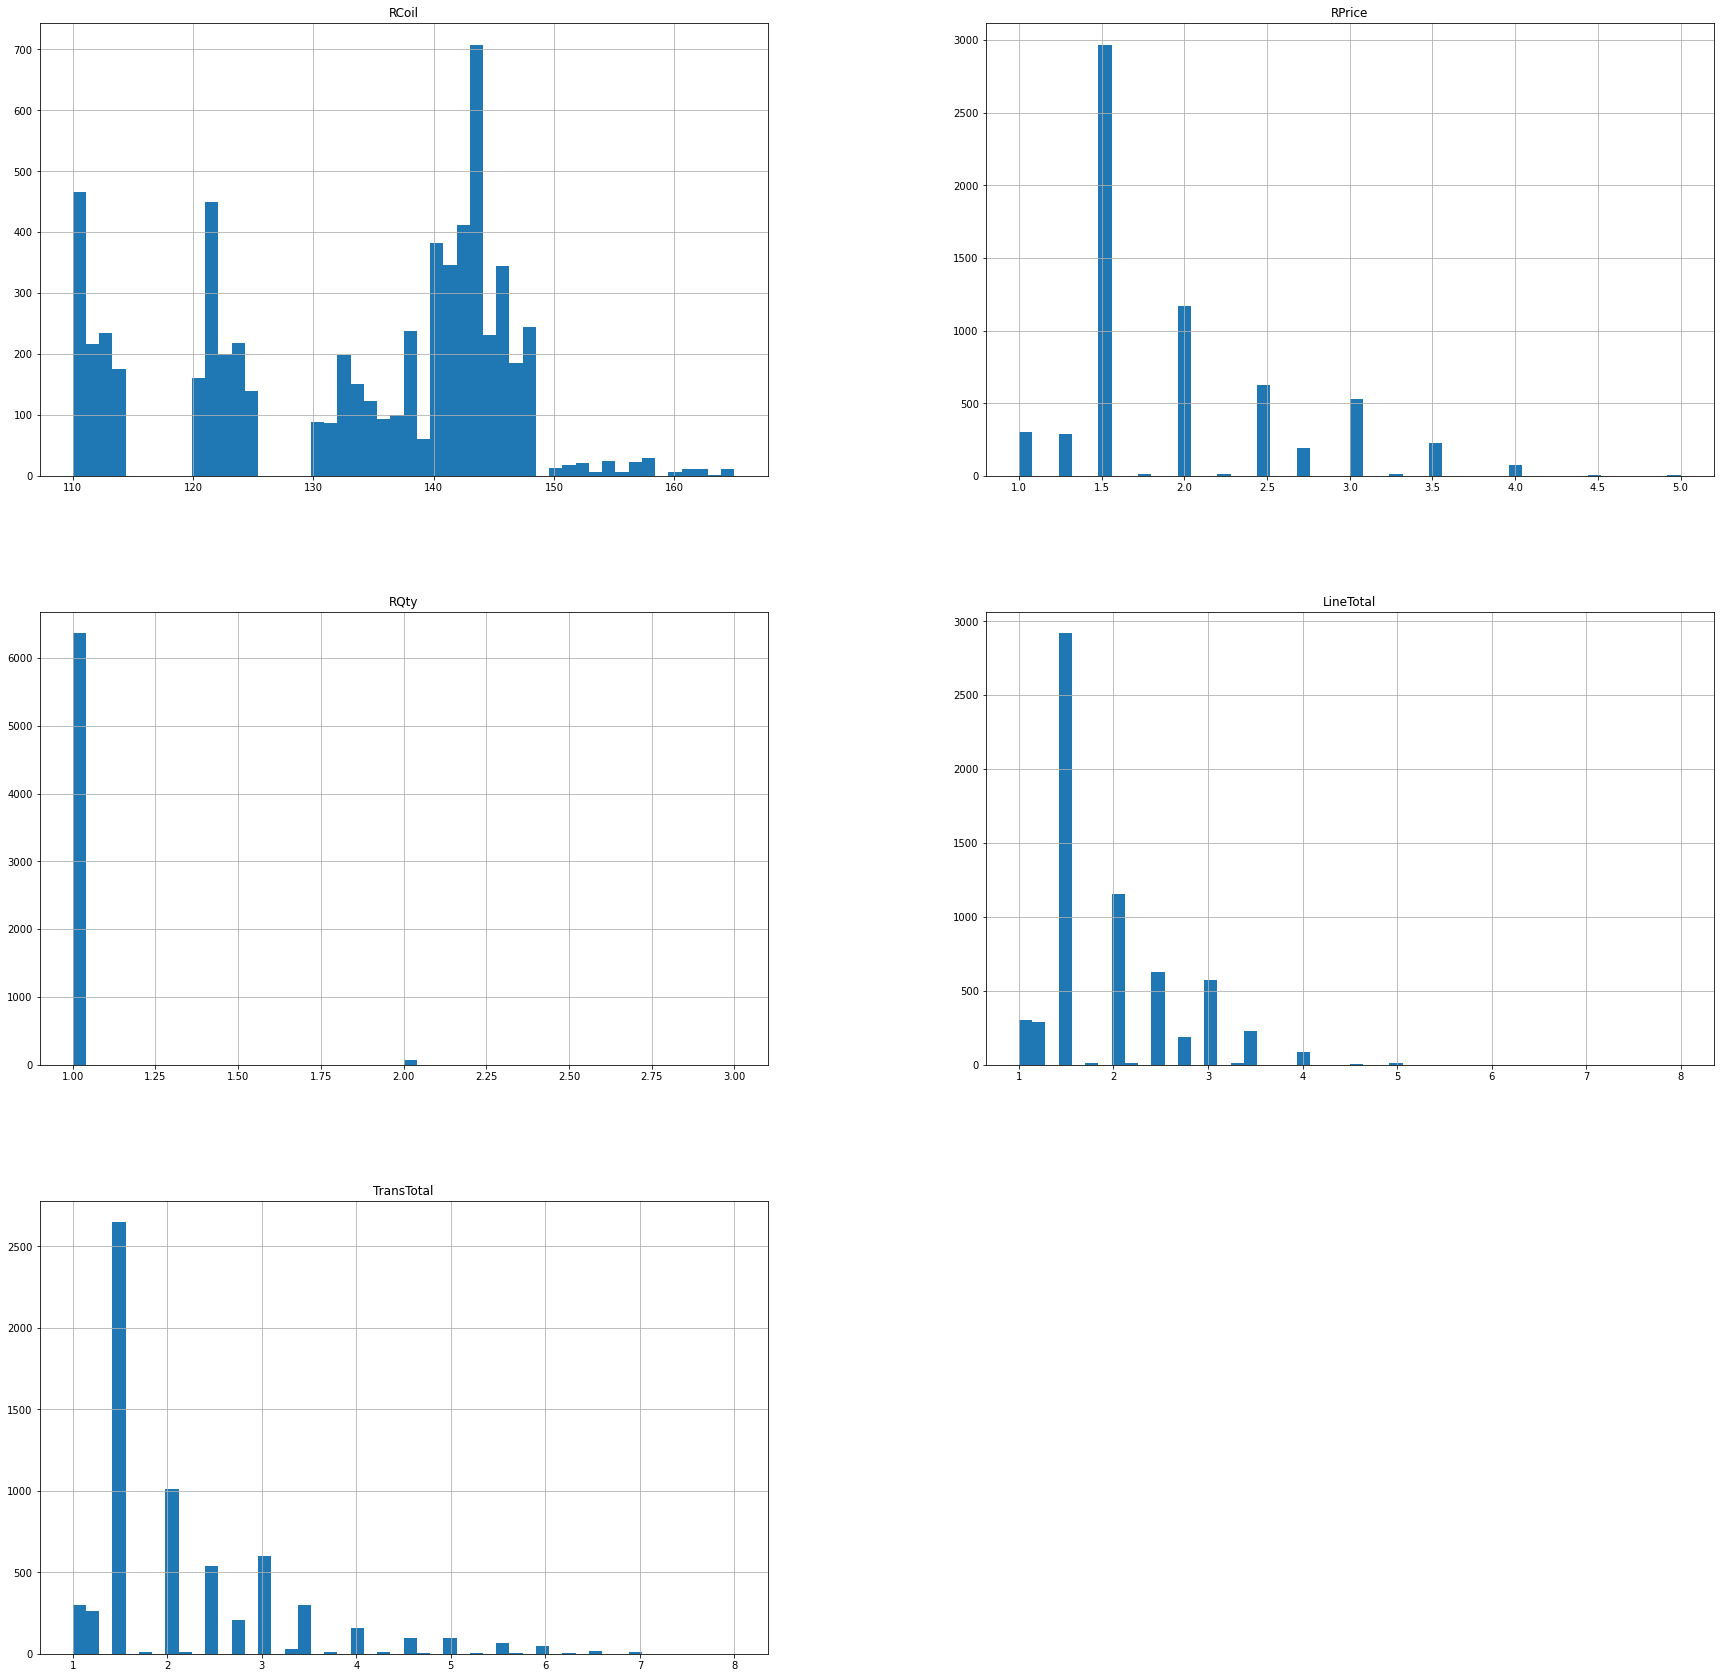

In [33]:
n_db.hist(bins=50, figsize=(30,30))

Data seem in line with the expectationa and do not seem to be very unbalanced. Given that no detailed information about the nature of the data are available, no further action has been taken to rescale/normalize the data for the time being. 

A check for the presence of outliers has then been performed. The check has been, to begin with, done graphically with boxplots. Progressively, columns have been removed so that also visualisation of features with smaller magnitude was possible:

<AxesSubplot:>

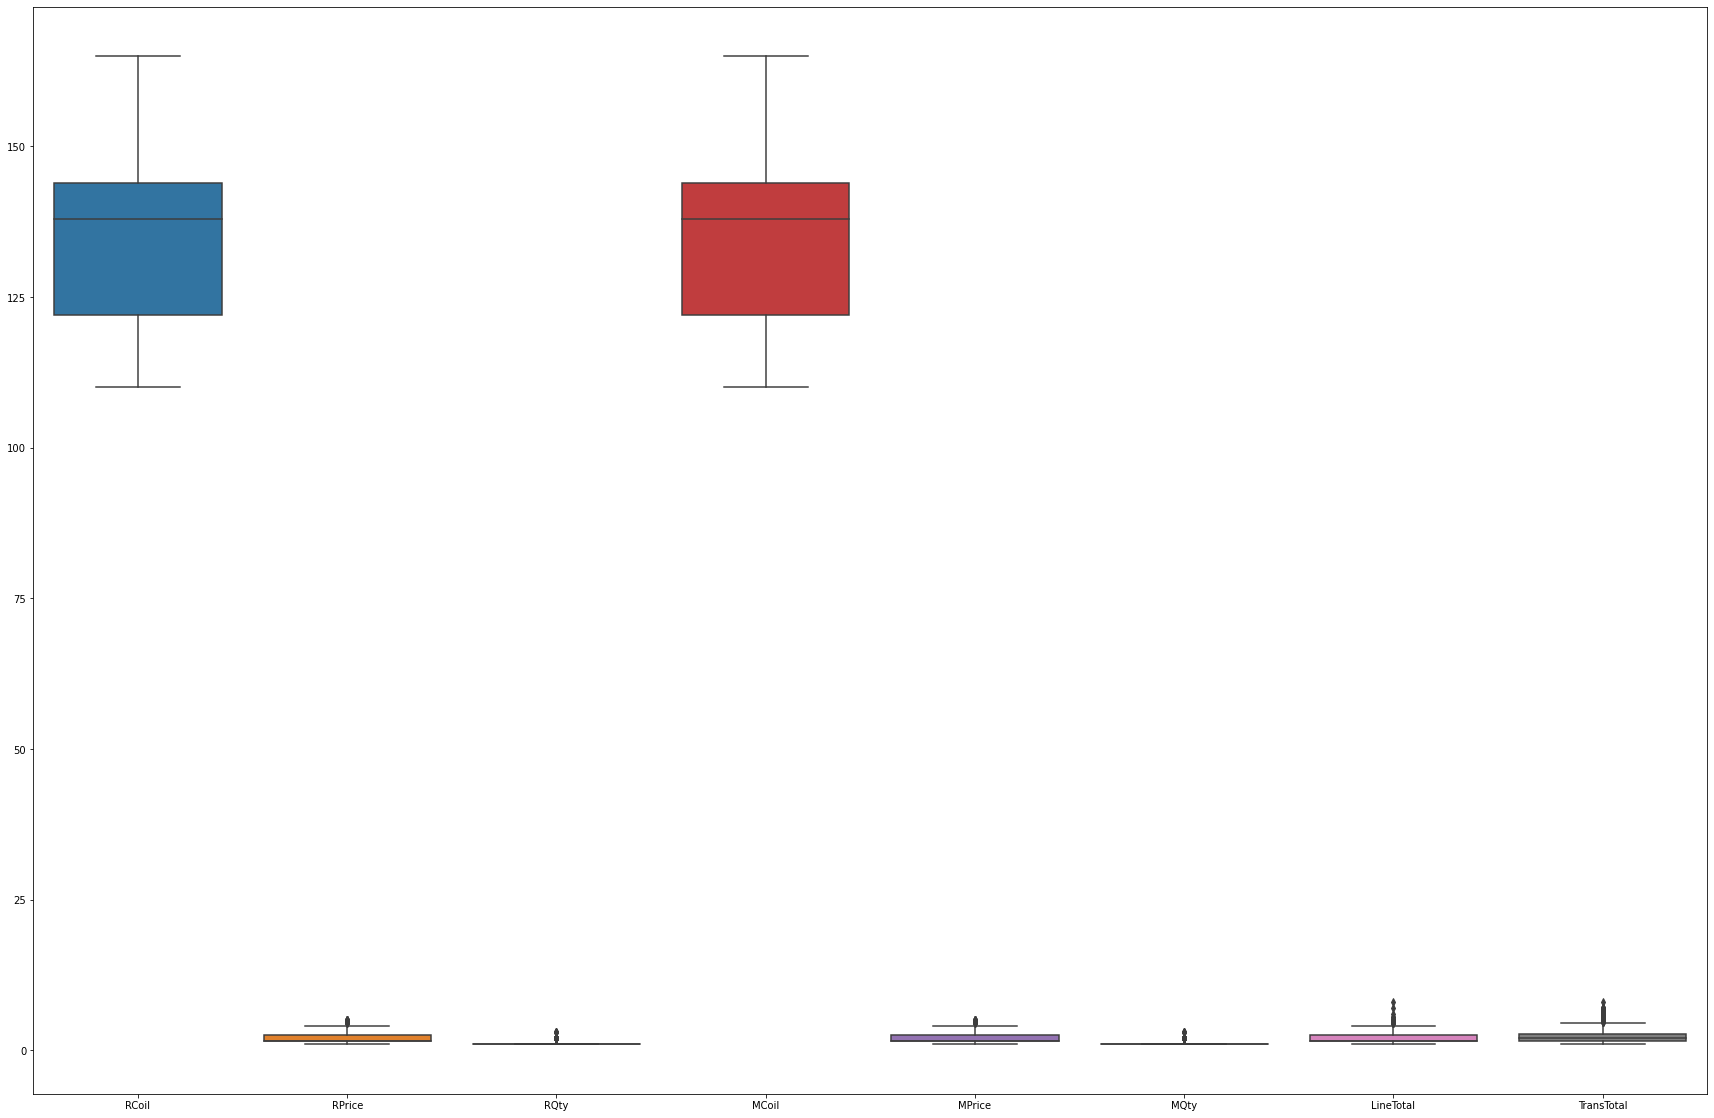

In [34]:
newdb_no_trans=newdb.copy()
newdb_no_trans=newdb_no_trans.drop("Transaction",axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_trans)

<AxesSubplot:>

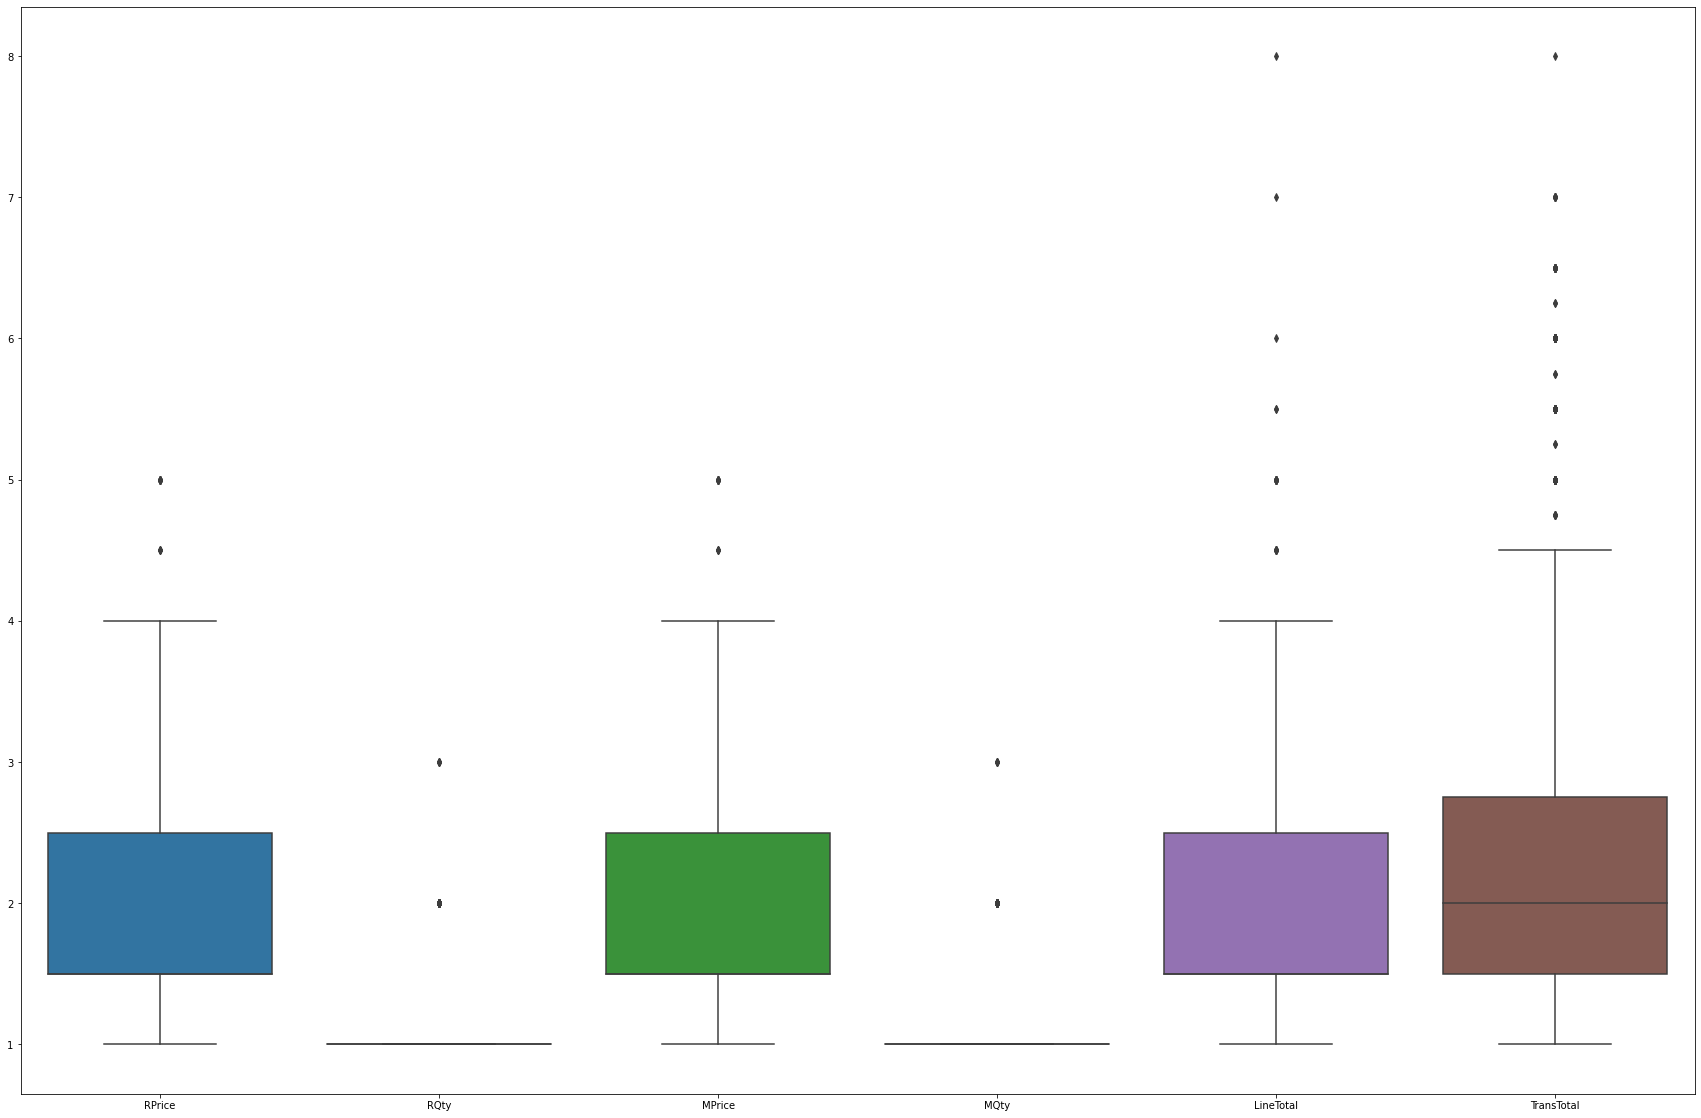

In [35]:
newdb_no_big=newdb.copy()
newdb_no_big=newdb_no_big.drop(["Transaction","RCoil","MCoil"],axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_big)

<AxesSubplot:>

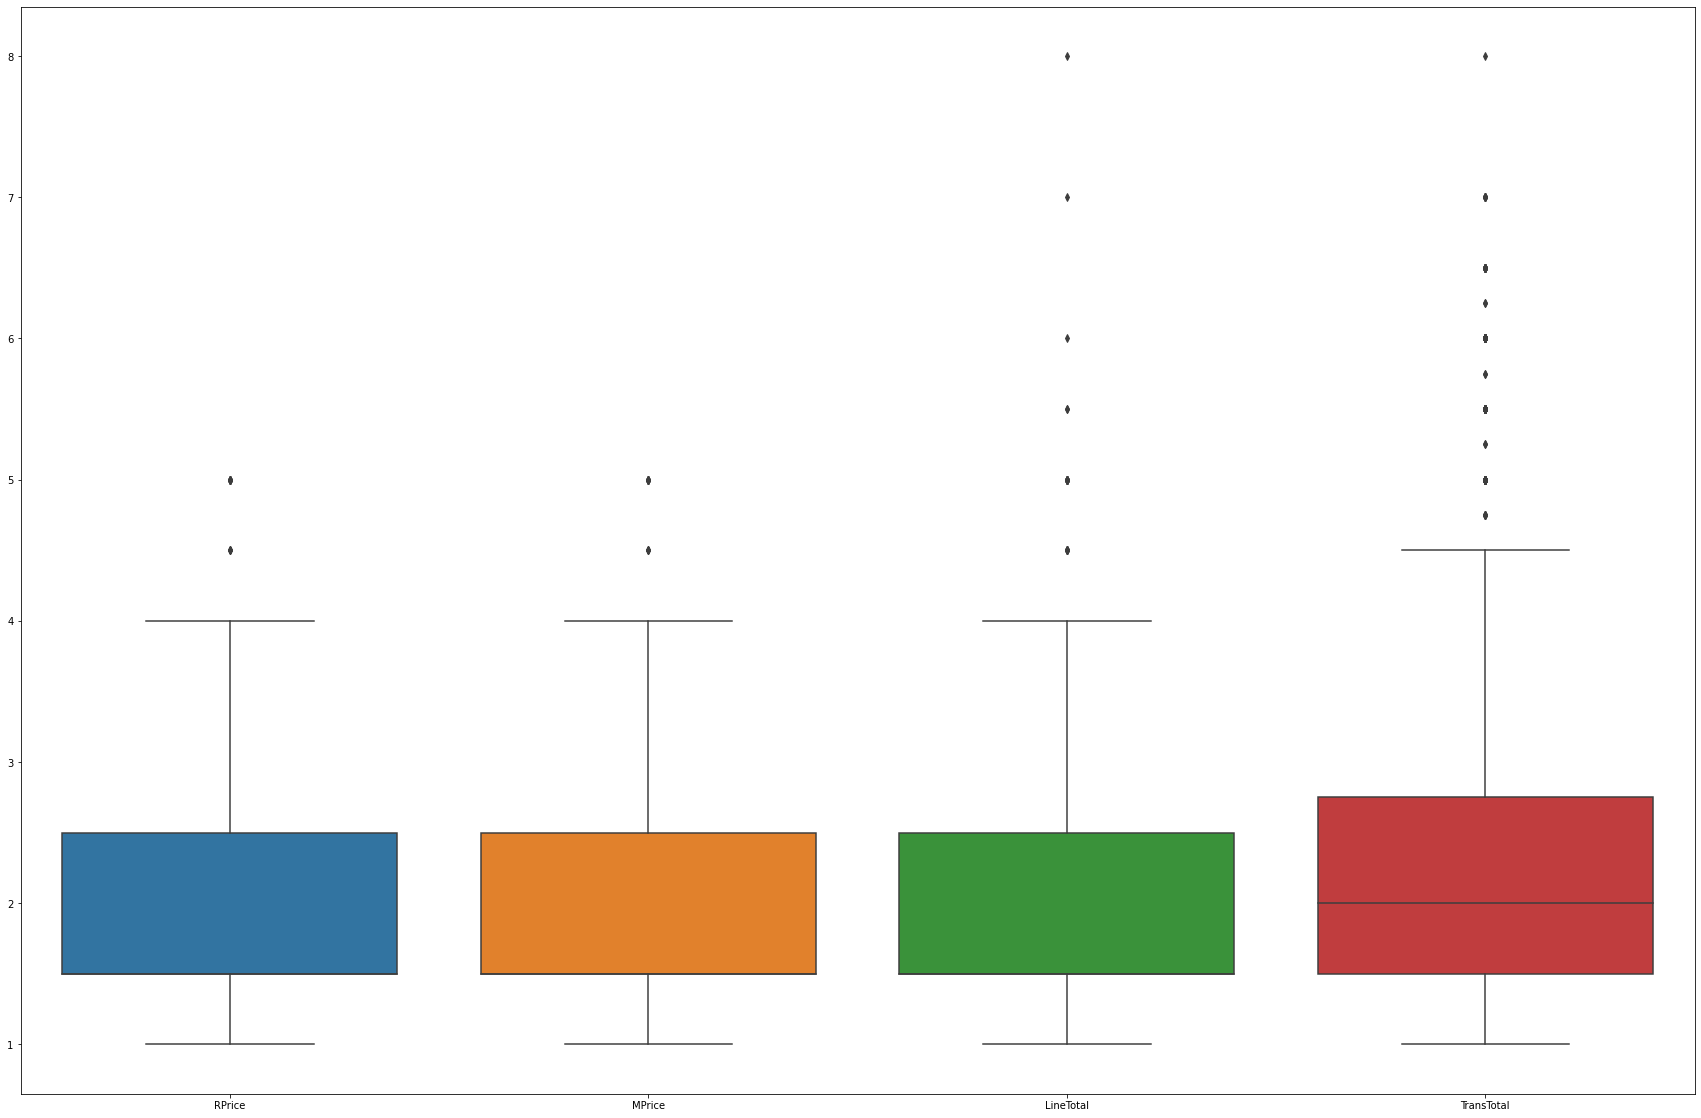

In [36]:
newdb_no_big2=newdb.copy()
newdb_no_big2=newdb_no_big2.drop(["Transaction","RCoil","MCoil","RQty","MQty"],axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_big2)

There seems not to be any absurd value in any of the feature. To double check this, the feature "TransTotal", which will also be the target variable of the analysis, is analysed more in depth:

In [37]:
n_db[n_db["TransTotal"]>6]

Location                  Machine  \
679         GuttenPlans        GuttenPlans x1367   
680         GuttenPlans        GuttenPlans x1367   
681         GuttenPlans        GuttenPlans x1367   
782   Brunswick Sq Mall     BSQ Mall x1366 - ATT   
783         GuttenPlans        GuttenPlans x1367   
784         GuttenPlans        GuttenPlans x1367   
785         GuttenPlans        GuttenPlans x1367   
801         GuttenPlans        GuttenPlans x1367   
802         GuttenPlans        GuttenPlans x1367   
803         GuttenPlans        GuttenPlans x1367   
2898        GuttenPlans        GuttenPlans x1367   
2899        GuttenPlans        GuttenPlans x1367   
2900        GuttenPlans        GuttenPlans x1367   
2933        GuttenPlans        GuttenPlans x1367   
2934        GuttenPlans        GuttenPlans x1367   
2935        GuttenPlans        GuttenPlans x1367   
2978        GuttenPlans        GuttenPlans x1367   
2979        GuttenPlans        GuttenPlans x1367   
2980        GuttenPlans        GuttenPlans x1367   
3121  EB Public Library  EB Public Library x1380   
3122  EB Public Library  EB Public Library x1380   
3486        GuttenPlans        GuttenPlans x1367   
3487        GuttenPlans        GuttenPlans x1367   
3488        GuttenPlans        GuttenPlans x1367   
4011  EB Public Library  EB Public Library x1380   
4342        GuttenPlans        GuttenPlans x1367   
4343        GuttenPlans        GuttenPlans x1367   
5194  Brunswick Sq Mall   BSQ Mall x1364 - Zales   
5195  Brunswick Sq Mall   BSQ Mall x1364 - Zales   
5196  Brunswick Sq Mall   BSQ Mall x1364 - Zales   
6063  EB Public Library  EB Public Library x1380   
6064  EB Public Library  EB Public Library x1380   

                                         Product        Category  \
679               Jack Links Beef Steak Original            Food   
680                   Popchips Potato - Barbeque            Food   
681                      Monster Energy Original      Carbonated   
782                          Red Bull - Original      Carbonated   
783               Jack Links Beef Steak Original            Food   
784                        KitKat - Crisp Wafers            Food   
785                      Monster Energy Original      Carbonated   
801               Jack Links Beef Steak Original            Food   
802                        KitKat - Crisp Wafers            Food   
803                      Snapple Tea - Raspberry  Non Carbonated   
2898                       Funyuns - Flaming Hot            Food   
2899                     Snapple Tea - Raspberry  Non Carbonated   
2900                       KitKat - Crisp Wafers            Food   
2933                     Snapple Tea - Raspberry  Non Carbonated   
2934                  Chesters Fries Flaming hot            Food   
2935                       KitKat - Crisp Wafers            Food   
2978                    Snapple Diet Tea - Lemon  Non Carbonated   
2979                              Lays - Classic            Food   
2980                       KitKat - Crisp Wafers            Food   
3121  Bai Antioxidant - Tanzania Lemon Super Tea  Non Carbonated   
3122        Red Bull - Energy Drink - Sugar Free      Carbonated   
3486                     Snapple Tea - Raspberry  Non Carbonated   
3487                       Funyuns - Flaming Hot            Food   
3488                       KitKat - Crisp Wafers            Food   
4011               Pringles - Sour Cream & Onion            Food   
4342                       KitKat - Crisp Wafers            Food   
4343                  Chesters Fries Flaming hot            Food   
5194                     Monster Energy Original      Carbonated   
5195                       KitKat - Crisp Wafers            Food   
5196              Wonderful Pistachios - Variety            Food   
6063                   Pringles - Cheddar Cheese            Food   
6064                         Oreo Mini - Go Paks            Food   

                        TransDate    Type  RCoil  RPr

It is possible to notice that the values greter than 6 are still plausible values, as a consequence, no row has been dropped to prevent information loss. 

# Feature Engineering <a class="anchor" id="fifth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Some feature engineering was then perform to prepare the data to be fed to algotithms and models for analysis.

To begin with, the date feature was split:

In [38]:
n_db["Date_Split"]=n_db["TransDate"].str.split(", ")

In [39]:
n_db[["Day_of_Week","Month+Day","Year"]]=pd.DataFrame(n_db.Date_Split.tolist(),index=n_db.index)

At this point, some columns contain same information about the data as others. A drop is therefore necessary:

In [40]:
n_db=n_db.drop(["TransDate","Date_Split"],axis=1)

Days were then split between Festive and Working days. Days were classified as festive if they were either a saturday, a sunday, or a New Jersey State holiday (https://www.state.nj.us/nj/about/facts/holidays/). Holidays were considered up to July, month of the latest observation in the dataset. The code to perform such operation is as follows:

In [41]:
holiday=["January 1","January 17","February 21","April 15","May 30","June 17","July 4"]
n=(n_db["Day_of_Week"]=="Saturday") | (n_db["Day_of_Week"]=="Sunday") 
m=n_db["Month+Day"].isin(holiday)

In [42]:
n_db["Festive"]=np.where(n|m,1,0)

The column containing the year was also dropped as it contained do additional information given that all observation in the dataset are from 2022:

In [43]:
n_db=n_db.drop(["Year"],axis=1)

Once the days were classified as festive or nor, a column containing the month was created:

In [44]:
l=[]
for i in range(len(n_db["Month+Day"])):
    l.append(n_db["Month+Day"].iloc[i].split(" ")[0])
n_db["Month"]=l

And, once again, columns containing duplicate information were dropped:

In [45]:
n_db = n_db.drop(["Month+Day","Prcd Date"],axis=1)

The precise day date of the month was dropped as it was deemed not that relevant once the indication of the month, of the week day, and of whether that day was festive or not was included. 

## Exploratory Data Analysis <a class="anchor" id="sixth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In this section, some exploratory data analysis has been conducted in order to deepen the knowledge of the data at hand and to try to identify patterns or charcateristics linking different purchases.

The "TransTotal" has been analysed as it is the variable of interest of the analysis. The means has been plotted according to different weekdays:

<AxesSubplot:xlabel='Day_of_Week'>

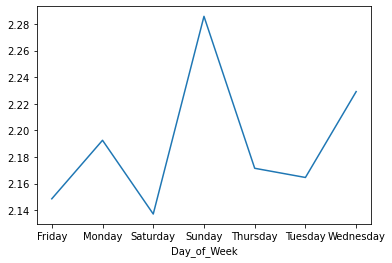

In [46]:
n_db.groupby('Day_of_Week')["TransTotal"].mean().plot()

There seems to be a difference in means between different days. To see whether this difference is really due to "Day_of_Week" or rather to other factors, the "Type" of the transaction was also included: 

In [47]:
n_db.groupby(['Type', 'Day_of_Week'])["TransTotal"].mean()

Type    Day_of_Week
Cash    Friday         1.837644
        Monday         1.847243
        Saturday       1.923684
        Sunday         1.868834
        Thursday       1.854058
        Tuesday        1.836763
        Wednesday      1.868385
Credit  Friday         2.826803
        Monday         2.850852
        Saturday       2.622010
        Sunday         2.867188
        Thursday       2.882698
        Tuesday        2.788512
        Wednesday      2.925393
Name: TransTotal, dtype: float64

There seems to be a relevant difference between the average transaction total for purchases made with card and the ones made with cash. In particular:

In [48]:
n_db.groupby('Type')["TransTotal"].mean()

Type
Cash      1.858324
Credit    2.833411
Name: TransTotal, dtype: float64

# First t-test <a class="anchor" id="seventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

To see whether the empirically discovered difference is statistically significant, a t-test has been run:

In [49]:
from scipy import stats
stats.ttest_ind(a=n_db[n_db['Type'] == 'Cash'].TransTotal, b=n_db[n_db['Type']== 'Credit'].TransTotal, equal_var=False)

Ttest_indResult(statistic=-31.916125815473997, pvalue=1.4498531340664352e-189)

Given that the p-value is approximately 0, the null hypothesis of non-significance of the difference has been rejected and so there is a statistically significant difference between the transactions done with card and with cash. 

At this point, since there is a statistically significant difference, a deeper comparison has been run on Cash VS Credit in the following section.

# Cash vs Credit Comparison <a class="anchor" id="eighth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In this section, a deeper analysis has been run to understand whether other features can be the main cause in the differnce between average transaction total when paying with card with respect to when paying with cash.

After this point there isn't any operation on the original ready n_db dataset, just some exploratory analysis. 

First of all, a comparison within categories has been carried out:

In [50]:
d_cash = n_db[n_db['Type'] == 'Cash']
d_credit = n_db[n_db['Type'] == 'Credit']

(<AxesSubplot:>, <AxesSubplot:>)

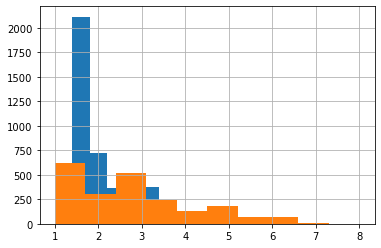

In [51]:
d_cash['TransTotal'].hist(), d_credit['TransTotal'].hist()

In [52]:
d_credit.groupby('Category')["TransTotal"].mean()

Category
Carbonated        2.740909
Food              2.842359
Non Carbonated    3.224379
Water             2.336788
Name: TransTotal, dtype: float64

In [53]:
d_credit.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       2.826803
Monday       2.850852
Saturday     2.622010
Sunday       2.867188
Thursday     2.882698
Tuesday      2.788512
Wednesday    2.925393
Name: TransTotal, dtype: float64

In [54]:
d_cash.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       1.837644
Monday       1.847243
Saturday     1.923684
Sunday       1.868834
Thursday     1.854058
Tuesday      1.836763
Wednesday    1.868385
Name: TransTotal, dtype: float64

In [55]:
d_cash.groupby('Category')["TransTotal"].mean(), d_credit.groupby('Category')["TransTotal"].mean()

(Category
 Carbonated        1.933788
 Food              1.707926
 Non Carbonated    2.519704
 Water             1.828448
 Name: TransTotal, dtype: float64,
 Category
 Carbonated        2.740909
 Food              2.842359
 Non Carbonated    3.224379
 Water             2.336788
 Name: TransTotal, dtype: float64)

There seems to be a difference between the average transtotal with cash and with credit in all categories of products, let us start by seeing whether the one in the "Carbonated" category is indeed statistically significant.

# Second T-test <a class="anchor" id="ninth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [56]:
from scipy import stats
stats.ttest_ind(a=d_cash[d_cash['Category'] == 'Carbonated'].TransTotal, b=d_credit[d_credit['Category'] == 'Carbonated'].TransTotal, equal_var=False)

Ttest_indResult(statistic=-13.847037248962115, pvalue=3.392838283865919e-38)

The t-test yield a p-value of 3.392838283865919e-38, meaning that the null hypothesis of non-significance is rejected. Given that there is a significant difference between the average transaction total with cash and credit card when it comes to "Carbonated" drinks, a further analysis is conducted to deepen the understanding.

# Cash-Carbonated vs Credit-Carbonated <a class="anchor" id="tenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Here follows some comparisons between the carbonated drinks that are bought with cash and those that are bought with credit card.

In [57]:
carbonated_cash = d_cash[d_cash['Category'] == 'Carbonated']
carbonated_credit =d_credit[d_credit['Category'] == 'Carbonated']

In [58]:
l = carbonated_cash.groupby('Product')['RPrice'].mean()-carbonated_credit.groupby('Product')['RPrice'].mean() == 0
#carbonated["Product"][l]
l = l[l==False]
la = l[l==False].index

In [59]:
carbonated_differ = n_db.loc[n_db['Product'].isin(la)]
carbonated_differ['Product'].value_counts()

Coca Cola - Zero Sugar                      517
Monster Energy Original                     385
Sunkist Soda - Orange                       217
Red Bull - Original                         157
Coca Cola - Regular                         155
Starbucks Refresher - Real Coconut Water     53
Canada Dry - Ginger Ale & Lemonde            32
Keto Krisp - Almond Butter                   27
Spindrift - Sparkling Water  Lime            22
Keto Krisp - Almond/Chocolate                15
Canada Dry - Ginger Ale                      15
Remedy Kombucha - Ginger Lemon                2
Name: Product, dtype: int64

In [60]:
carbonated_differ_g = carbonated_differ.drop(['Month','TransTotal','Festive','Location','Type','Machine','Category','RQty','LineTotal','Day_of_Week'],axis=1)
carbonated_differ_g

Product  RCoil  RPrice
8                      Monster Energy Original    144     3.0
17                     Monster Energy Original    146     3.0
19                     Monster Energy Original    146     3.0
20                     Monster Energy Original    144     3.0
21           Spindrift - Sparkling Water  Lime    140     1.0
...                                        ...    ...     ...
6387  Starbucks Refresher - Real Coconut Water    148     3.0
6390                    Coca Cola - Zero Sugar    140     1.5
6397                    Coca Cola - Zero Sugar    141     2.0
6400                    Coca Cola - Zero Sugar    141     2.0
6431         Canada Dry - Ginger Ale & Lemonde    140     1.5

[1597 rows x 3 columns]

Product
Canada Dry - Ginger Ale                     AxesSubplot(0.125,0.125;0.775x0.755)
Canada Dry - Ginger Ale & Lemonde           AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Regular                         AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Zero Sugar                      AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond Butter                  AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond/Chocolate               AxesSubplot(0.125,0.125;0.775x0.755)
Monster Energy Original                     AxesSubplot(0.125,0.125;0.775x0.755)
Red Bull - Original                         AxesSubplot(0.125,0.125;0.775x0.755)
Remedy Kombucha - Ginger Lemon              AxesSubplot(0.125,0.125;0.775x0.755)
Spindrift - Sparkling Water  Lime           AxesSubplot(0.125,0.125;0.775x0.755)
Starbucks Refresher - Real Coconut Water    AxesSubplot(0.125,0.125;0.775x0.755)
Sunkist Soda - Orange                       AxesSubplot(0.125,0.125;0.775x0.755)
Name: RPrice, dtype:

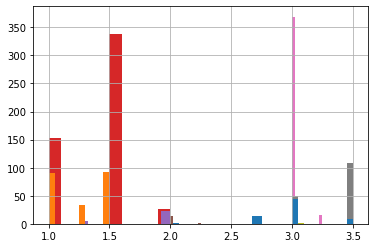

In [61]:
carbonated_differ_g.groupby('Product')['RPrice'].hist()

In [62]:
carbonated_differ_g.groupby('Product')['RPrice'].value_counts()

Product                                   RPrice
Canada Dry - Ginger Ale                   2.75       14
                                          2.00        1
Canada Dry - Ginger Ale & Lemonde         1.50       22
                                          2.00       10
Coca Cola - Regular                       1.50      145
                                          2.00       10
Coca Cola - Zero Sugar                    1.50      339
                                          1.00      152
                                          2.00       26
Keto Krisp - Almond Butter                2.00       22
                                          1.25        5
Keto Krisp - Almond/Chocolate             2.00       14
                                          2.25        1
Monster Energy Original                   3.00      369
                                          3.25       16
Red Bull - Original                       3.50      108
                                          3.00       49

In [63]:
cola_zero = carbonated_differ.loc[carbonated_differ['Product'] == 'Coca Cola - Zero Sugar']
cola_zero.groupby('RPrice')['Location'].value_counts()

RPrice  Location         
1.0     GuttenPlans          152
1.5     EB Public Library    140
        GuttenPlans          128
        Brunswick Sq Mall     61
        Earle Asphalt         10
2.0     EB Public Library     26
Name: Location, dtype: int64

In [64]:
cola_zero.groupby('RPrice')['Month'].value_counts()

RPrice  Month   
1.0     January     52
        March       45
        February    43
        April       12
1.5     April       88
        May         84
        July        66
        June        65
        March       23
        February     8
        August       5
2.0     August      26
Name: Month, dtype: int64

In [65]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('Product')['RPrice'].mean()

Product
Bubly - Cherry                                   1.500000
Bubly - Mango                                    1.500000
Canada Dry - Ginger Ale                          2.700000
Canada Dry - Ginger Ale & Lemonde                1.656250
Coca Cola - Regular                              1.532258
Coca Cola - Zero Sugar                           1.378143
Keto Krisp - Almond Butter                       1.861111
Keto Krisp - Almond/Chocolate                    2.016667
Monster Energy  Zero Ultra                       3.000000
Monster Energy Original                          3.010390
Red Bull - Energy Drink - Sugar Free             3.500000
Red Bull - Original                              3.343949
Remedy Kombucha - Ginger Lemon                   3.000000
S. Pellegrino Essenza Mineral Water - Blood O    2.500000
Spindrift - Sparkling Water  Lime                1.431818
Spindrift - Sparkling Water - Pineapple          1.500000
Starbucks Refresher - Real Coconut Water         3.075472
Sunkis

In [66]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('RPrice')['Product'].count()

RPrice
1.00    245
1.25     39
1.50    679
2.00     83
2.25      1
2.50      3
2.75     14
3.00    469
3.25     16
3.50    137
Name: Product, dtype: int64

In [67]:
carbonated.groupby('Product')['RPrice'].sum()

Product
Bubly - Cherry                                      7.50
Bubly - Mango                                       7.50
Canada Dry - Ginger Ale                            40.50
Canada Dry - Ginger Ale & Lemonde                  53.00
Coca Cola - Regular                               237.50
Coca Cola - Zero Sugar                            712.50
Keto Krisp - Almond Butter                         50.25
Keto Krisp - Almond/Chocolate                      30.25
Monster Energy  Zero Ultra                         12.00
Monster Energy Original                          1159.00
Red Bull - Energy Drink - Sugar Free               73.50
Red Bull - Original                               525.00
Remedy Kombucha - Ginger Lemon                      6.00
S. Pellegrino Essenza Mineral Water - Blood O       7.50
Spindrift - Sparkling Water  Lime                  31.50
Spindrift - Sparkling Water - Pineapple            76.50
Starbucks Refresher - Real Coconut Water          163.00
Sunkist Soda - Orange  

From the analyses carried out above, what was discovered is that different products have different prices for unknown reasons. Therefore, it is not possible to conclude whether carbonated drinks are those really driving the difference between cash and credit or not. 

The same holds true also for the other categories of products, for easiness of presentation codes are not reported in the final version but the results are in line with what happened with carbonated drinks.

## Location  <a class="anchor" id="eleventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

At this point, an analysis of how the location might have had an impact of the transaction total has been carried out.

In [68]:
n_db.Location.value_counts()

GuttenPlans          2567
EB Public Library    1919
Brunswick Sq Mall    1279
Earle Asphalt         676
Name: Location, dtype: int64

In [69]:
n_db.groupby('Location')['TransTotal'].mean()

Location
Brunswick Sq Mall    2.154027
EB Public Library    2.274752
Earle Asphalt        1.865385
GuttenPlans          2.212992
Name: TransTotal, dtype: float64

Here the variation seems to be way smaller that the one obtained for the cash vs credit comparison performed above.

In [70]:
n_db.groupby(['Location','Day_of_Week'])['TransTotal'].sum()

Location           Day_of_Week
Brunswick Sq Mall  Friday          346.75
                   Monday          389.25
                   Saturday        607.50
                   Sunday          509.50
                   Thursday        269.00
                   Tuesday         346.00
                   Wednesday       287.00
EB Public Library  Friday          474.75
                   Monday          762.00
                   Saturday        453.25
                   Sunday          346.75
                   Thursday        744.75
                   Tuesday         771.50
                   Wednesday       812.25
Earle Asphalt      Friday          266.75
                   Monday          265.00
                   Saturday          4.75
                   Sunday            2.75
                   Thursday        236.75
                   Tuesday         224.75
                   Wednesday       260.25
GuttenPlans        Friday         1092.50
                   Monday          826.75
   

From the analysis above, it is possible to confirm what was already foreseeable with logic: transaction totals are higher in the mall during weekends and in the offices/library during weekdays. This was imaginable since the library and the offices are working venues while the mall is mainly a leisure one.

## RCoil  <a class="anchor" id="twelfth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Here we tried to analyse whether the position of the product in the vending machine has some relevance.

<AxesSubplot:xlabel='RCoil'>

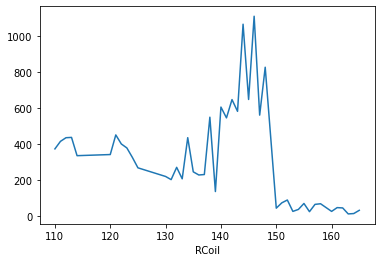

In [71]:
n_db.groupby('RCoil')['TransTotal'].sum().plot()

From this representation it seems that the most used coils are the ones approximately at the middle. Let us try to gain some more information by grouping the coils and plotting an heatmap. 

A variable summarizing the coils has been created. This variable, in particular, contains the number of the row of the coil used (here we assumed that the vending machines at hand have a standard configuration: 10 coils per row):

In [72]:
n_db_c=n_db.copy()

In [73]:
n_db_c['hor_eye'] = np.nan

In [74]:
for i in range(len(n_db_c)):
    n_db_c['hor_eye'].loc[n_db_c.index[i]] = int(str(n_db_c['RCoil'].loc[n_db_c.index[i]])[1])

This new variable is than use to plot an heatmap to use the usage of coils:

In [75]:
a = n_db_c.groupby('RCoil')['TransTotal'].sum()
b = a.to_frame()
data = pd.DataFrame({'RCoil': range(110,170),
                   'Total': 0},
                   columns = ['RCoil', 'Total'])
data = pd.merge(b, data, left_on="RCoil", right_on="RCoil")
data.drop(['Total'], axis=1, inplace= True)
data['Row'] = np.nan
data['Column'] = np.nan
for i in range(len(data)):
    data['Row'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[1])
    data['Column'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[2])
data.drop(['RCoil'], axis=1, inplace = True)
datas = pd.DataFrame(np.nan, index=[i for i in range(1,7)], columns=[i for i in range(0,10)])
for i in range(len(data)):
    a = data['Row'].loc[data.index[i]]
    b = data['Column'].loc[data.index[i]]
    c = data['TransTotal'].loc[data.index[i]]
    datas[a][b] = c
datas.drop([0,6,7,8,9], axis =1, inplace = True)
datas

1       2       3        4      5
1  413.00  448.75  200.50   543.50  71.50
2  433.25  398.50  268.75   645.00  87.25
3  435.00  376.50  205.00   579.75  24.00
4  333.50  323.75  433.50  1063.75  35.00
5     NaN  266.00  243.75   645.75  68.00
6     NaN     NaN  226.25  1108.00  22.50

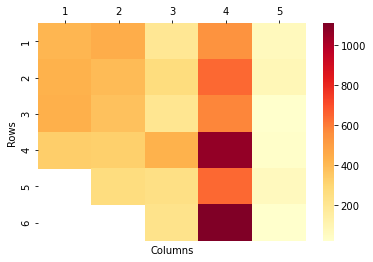

In [76]:
ax = sns.heatmap(datas, cmap = 'YlOrRd')
ax.set(xlabel="Columns", ylabel="Rows")
ax.xaxis.tick_top()

This heatmap seems to verify what was also seen before. Though, given that no extra information is provided about the configurations of the machines, we decided not to further investigate in this respect as it might be the case that the central coils are the most used because some machines might have only them, for instance. Still, these results as well as the ones obtained for the previous features, can be useful to develop new strategies and theories if combined with further information.  

## CatBoost  <a class="anchor" id="thirteenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>



To verify what has been previously discovered through data exploration procedures, a CatBoost has been run. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. This procedure was selected as clustering algorithms did not perform well given the huge number of categorical varibales present in the dataset. For this reason, a tree based approach was selected in order to identify what are the features generating the greatest difference between observations and so granting an higher information gain once split on those variables has been performed. 

In [77]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

To begin with, the target feature is isolated from the rest of the dataset and the train/test split is performed:

In [78]:
target = n_db["TransTotal"]

In [79]:
n_db=n_db.drop(["TransTotal"],axis=1)

In [80]:
n_db=n_db.drop(["LineTotal", "RPrice"],axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(n_db, target, test_size = 0.2, random_state=5)

In [82]:
train_dataset = cb.Pool(X_train, y_train, cat_features = ["Location", "Machine", "Product", "Category","Type", "Day_of_Week", "Festive", "Month", "RCoil"])
test_dataset = cb.Pool(X_test, y_test, cat_features = ["Location", "Machine", "Product", "Category","Type", "Day_of_Week", "Festive", "Month", "RCoil"])

In [83]:
model = cb.CatBoostRegressor(loss_function="RMSE")

A grid-search has then been run to identify the optimal parameters among the ones fed to the algorithm:

In [84]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.025,0.05,0.075, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid,train_dataset)

0:	learn: 2.3747091	test: 2.3600307	best: 2.3600307 (0)	total: 66.3ms	remaining: 6.56s
1:	learn: 2.3258761	test: 2.3112916	best: 2.3112916 (1)	total: 72ms	remaining: 3.53s
2:	learn: 2.2795720	test: 2.2650144	best: 2.2650144 (2)	total: 74ms	remaining: 2.39s
3:	learn: 2.2346649	test: 2.2201536	best: 2.2201536 (3)	total: 76.2ms	remaining: 1.83s
4:	learn: 2.1886092	test: 2.1748669	best: 2.1748669 (4)	total: 79.7ms	remaining: 1.51s
5:	learn: 2.1457486	test: 2.1322492	best: 2.1322492 (5)	total: 82.7ms	remaining: 1.3s
6:	learn: 2.1020531	test: 2.0891029	best: 2.0891029 (6)	total: 86.1ms	remaining: 1.14s
7:	learn: 2.0595092	test: 2.0478987	best: 2.0478987 (7)	total: 89.1ms	remaining: 1.02s
8:	learn: 2.0186370	test: 2.0076908	best: 2.0076908 (8)	total: 91.9ms	remaining: 929ms
9:	learn: 1.9785888	test: 1.9689526	best: 1.9689526 (9)	total: 94ms	remaining: 846ms
10:	learn: 1.9397263	test: 1.9308295	best: 1.9308295 (10)	total: 97.4ms	remaining: 788ms
11:	learn: 1.9045549	test: 1.8957570	best: 1.895

{'params': {'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.075},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

The moel has the been fit on the optimal hyperparameters:

In [85]:
model = cb.CatBoostRegressor(depth= 10,l2_leaf_reg= 1,iterations=200,learning_rate= 0.075,loss_function="RMSE")
model.fit(train_dataset)

0:	learn: 1.0063639	total: 11.1ms	remaining: 2.22s
1:	learn: 0.9768262	total: 15.1ms	remaining: 1.5s
2:	learn: 0.9444647	total: 27.5ms	remaining: 1.81s
3:	learn: 0.9145371	total: 36.4ms	remaining: 1.78s
4:	learn: 0.8870024	total: 47.7ms	remaining: 1.86s
5:	learn: 0.8619501	total: 57.8ms	remaining: 1.87s
6:	learn: 0.8407577	total: 66.9ms	remaining: 1.84s
7:	learn: 0.8288552	total: 68.3ms	remaining: 1.64s
8:	learn: 0.8115300	total: 77.6ms	remaining: 1.65s
9:	learn: 0.7926340	total: 86.2ms	remaining: 1.64s
10:	learn: 0.7774517	total: 94.7ms	remaining: 1.63s
11:	learn: 0.7615223	total: 102ms	remaining: 1.6s
12:	learn: 0.7483207	total: 109ms	remaining: 1.57s
13:	learn: 0.7356601	total: 118ms	remaining: 1.57s
14:	learn: 0.7272652	total: 120ms	remaining: 1.48s
15:	learn: 0.7170380	total: 128ms	remaining: 1.47s
16:	learn: 0.7063044	total: 136ms	remaining: 1.47s
17:	learn: 0.6987683	total: 143ms	remaining: 1.45s
18:	learn: 0.6895710	total: 151ms	remaining: 1.44s
19:	learn: 0.6825605	total: 160m

And the feature importances have been obtained:

Text(0.5, 0, 'CatBoost Feature Importance')

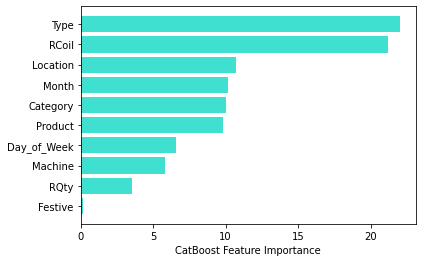

In [86]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(n_db.columns[sorted_feature_importance], model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Once the importances have been devised, let us asses the performance of the algorithm:

In [87]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.65
R2: 0.61


# PART B (Preparation of the datasets to be used on STATA to analyze survey results)

The starting point is the import of the survey dataset:

In [90]:
df = pd.read_csv("H-FARM INNOVATION business case_November 19, 2022_11.57.csv", sep = ";")

Where the column concerning the card is null, we associated a 1 in the newly created "Non_user" column:

In [92]:
l = np.where(df["Q10"].isnull())[0]

In [93]:
df["Non_user"] = 0

In [94]:
for i in l:
    df.at[i, "Non_user"] = 1

A similar procedure was carried out for the credit card users:

In [95]:
df["Card_y"] = 0

In [96]:
n = np.where(df["Q10"]==1.0)

In [97]:
for i in n:
    df.at[i, "Card_y"] = 1

and also for the cash users:

In [98]:
df["Card_n"] = 0

In [99]:
m = np.where(df["Q10"]==0.0)

In [100]:
for i in m:
    df.at[i, "Card_n"] = 1

Then, the column concerning card ussage has been dropped since now its information is stored in the previously created columns:

In [101]:
df = df.drop("Q10", axis=1)

We created the df1 dataset containing only student observations and the df2 containing only worker observations:

In [104]:
df1 = df.drop("Usage Workplace", axis=1)

In [105]:
df1 = df1.dropna()

In [106]:
df2 = df.drop("Usage Library", axis=1)

In [107]:
df2 = df2.dropna()

In [108]:
df1.to_csv("df_stud.csv")
df2.to_csv("df_work.csv")

# PART C (Preparation of the datasets to be used on STATA to analyze A/B survey's results)

We import the relevent datasets and remove excess rows:

In [110]:
df1 = pd.read_csv("A_B test_November 26, 2022_07.00.csv", sep = ";")

In [111]:
df1 = df1.drop([0,1,2], axis = 0)

In [113]:
df2 = pd.read_csv("A_B test 2_November 26, 2022_07.02.csv", sep = ";")

In [115]:
df2 = df2.drop([0,1,2], axis = 0)

We concatenate the two datasets to build a new one:

In [116]:
df_final = df1.append(df2)

And we create a new column containing the offer type showed to the respondent:

In [117]:
l = [0]*100+[1]*103

In [118]:
df_final["offer_type"] = l

We then renamed the columns for easiness of procedures:

In [119]:
df_final.rename(columns={"Q3":"age", "Q4":"NJ resident", "Q5":"occupation", "Q7_1": "vending_user", "Q9": "nonuser_to_app", "Q10_1":"card_yn", "Unnamed: 6":"cash_to_app"}, inplace=True)

and dropped rows corresponding to those who pay with credit card:

In [120]:
df_final = df_final.dropna(axis=0, subset=["nonuser_to_app", "cash_to_app"], how="all")

Before exporting the csv to be used on STATA, we combined the observations for non users with the ones for cash users in a single column named "propensity":

In [121]:
df_final["propensity"] = df_final["nonuser_to_app"].fillna(df_final["cash_to_app"])

In [122]:
df_final.to_csv("df_final_ab.csv")